In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [32]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5,decay_function=None,random_seed=112)
som.random_weights_init(X)


In [33]:
som.train_random(data = X, num_iteration =100 )

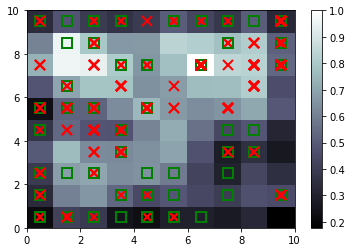

In [34]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['x', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
         
show()

In [35]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,7)], mappings[(1,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [36]:
frauds

array([[6.96090562e-01, 1.37500000e+01, 3.75578947e+00, 1.50000000e+00,
        7.50000000e+00, 5.30769231e+00, 1.06875000e+01, 5.78947368e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+03, 8.00100000e+03, 0.00000000e+00],
       [5.37082197e-01, 1.37500000e+01, 6.07157895e+00, 1.04178571e+00,
        7.50000000e+00, 4.07692308e+00, 1.06875000e+01, 1.40350877e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+03, 1.30010000e+04, 1.00400000e-02],
       [5.61424584e-01, 1.37500000e+01, 9.92842105e+00, 1.17857143e+00,
        7.50000000e+00, 2.23076923e+00, 2.49375000e+01, 7.36842105e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+03, 1.30010000e+04, 2.46000000e-03],
       [5.64804248e-01, 1.37500000e+01, 1.14021053e+01, 1.25000000e+00,
        7.50000000e+00, 2.23076923e+00, 1.42500000e+01, 1.75438596e-02,
        0.00000000e+00, 0.00000000e+0

In [37]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [10]:
customers = dataset.iloc[:, 1:].values

In [11]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [12]:

customers = sc.fit_transform(customers)

In [13]:
import tensorflow as tf

In [14]:
ann = tf.keras.models.Sequential()

In [15]:
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
ann.fit(customers, is_fraud, batch_size = 2, epochs = 10)

Epoch 1/10
345/345 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.9188
Epoch 2/10
345/345 [==============================] - 0s 1ms/step - loss: 0.1993 - accuracy: 0.9377
Epoch 3/10
345/345 [==============================] - 1s 2ms/step - loss: 0.1804 - accuracy: 0.9377
Epoch 4/10
345/345 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9377
Epoch 5/10
345/345 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9377
Epoch 6/10
345/345 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9377
Epoch 7/10
345/345 [==============================] - 1s 1ms/step - loss: 0.1551 - accuracy: 0.9377
Epoch 8/10
345/345 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9377
Epoch 9/10
345/345 [==============================] - 1s 2ms/step - loss: 0.1444 - accuracy: 0.9377
Epoch 10/10
345/345 [==============================] - 1s 2ms/step - loss: 0.1395 - accuracy: 0.9377

In [18]:
pred = ann.predict(customers)

In [19]:
pred = np.concatenate((dataset.iloc[:, 0:1].values,pred), axis = 1)

In [20]:
pred = pred[pred[:, 1].argsort()]

In [21]:
pred

array([[1.57250280e+07, 3.00914049e-04],
       [1.56548590e+07, 3.24606895e-04],
       [1.55664950e+07, 3.41475010e-04],
       ...,
       [1.56152960e+07, 3.81563663e-01],
       [1.57523440e+07, 3.94174159e-01],
       [1.56514600e+07, 4.20340121e-01]])